<a href="https://colab.research.google.com/github/barzansaeedpour/PyTorch-for-DeepLearning/blob/main/03_Computer_Vision_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision


## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch   
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset    

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.1+cu121
0.18.1+cu121


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.dataset - https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train= True, # do we want the training data?
    download=True, # do we want to download yes/bo?
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download=True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:04<00:00, 6352485.17it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 140444.11it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2558585.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16975060.53it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visulazing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

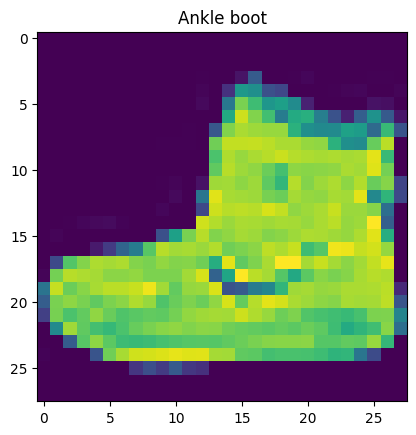

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"{class_names[label]}")

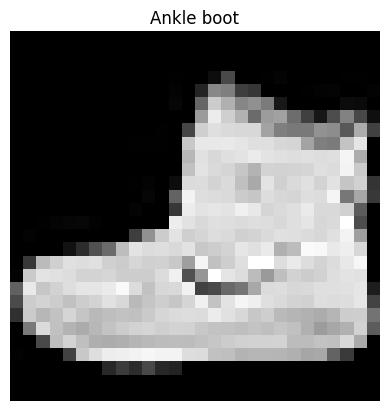

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

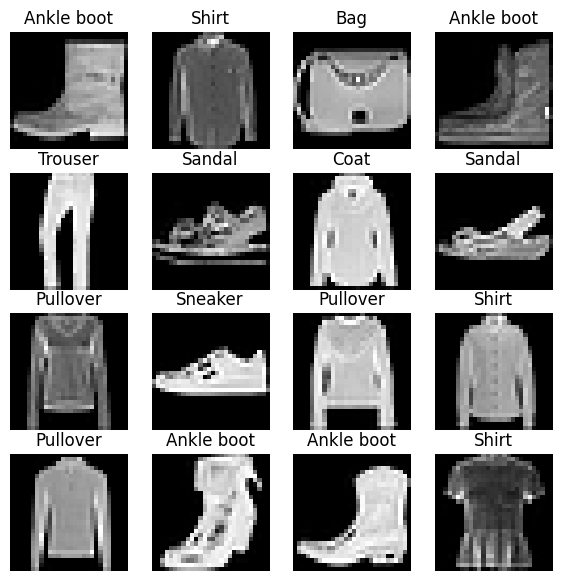

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (7,7))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or we'll need non-linearities?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computig hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False,)

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b2c44d0d840>,
 <torch.utils.data.dataloader.DataLoader at 0x7b2c452a2d70>)

In [15]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7b2c44d0d840>, <torch.utils.data.dataloader.DataLoader object at 0x7b2c452a2d70>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [16]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


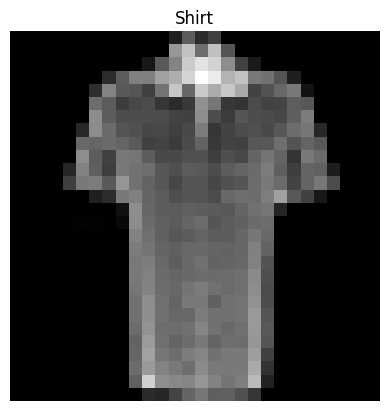

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False);

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

when start to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity whe necessary.

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happend
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,
                      out_features = hidden_units),
            nn.Linear(in_features= hidden_units,
                      out_features= output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup mode with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784, # this is 28*28
    hidden_units= 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochastic gradient descent)
* Evaluation metirc - since we're working on a classification problem, let's use accuracy as our evaluation metric

Adding some helper functions:

In [23]:
"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

# def walk_through_dir(dir_path):
#     """
#     Walks through dir_path returning its contents.
#     Args:
#     dir_path (str): target directory

#     Returns:
#     A print out of:
#       number of subdiretories in dir_path
#       number of images (files) in each subdirectory
#       name of each subdirectory
#     """
#     for dirpath, dirnames, filenames in os.walk(dir_path):
#         print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
#     """Plots decision boundaries of model predicting on X in comparison to y.

#     Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
#     """
#     # Put everything to CPU (works better with NumPy + Matplotlib)
#     model.to("cpu")
#     X, y = X.to("cpu"), y.to("cpu")

#     # Setup prediction boundaries and grid
#     x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#     y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#     xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

#     # Make features
#     X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

#     # Make predictions
#     model.eval()
#     with torch.inference_mode():
#         y_logits = model(X_to_pred_on)

#     # Test for multi-class or binary and adjust logits to prediction labels
#     if len(torch.unique(y)) > 2:
#         y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
#     else:
#         y_pred = torch.round(torch.sigmoid(y_logits))  # binary

#     # Reshape preds and plot
#     y_pred = y_pred.reshape(xx.shape).detach().numpy()
#     plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())


# # Plot linear data or training and test and predictions (optional)
# def plot_predictions(
#     train_data, train_labels, test_data, test_labels, predictions=None
# ):
#     """
#   Plots linear training data and test data and compares predictions.
#   """
#     plt.figure(figsize=(10, 7))

#     # Plot training data in blue
#     plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

#     # Plot test data in green
#     plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

#     if predictions is not None:
#         # Plot the predictions in red (predictions were made on the test data)
#         plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

#     # Show the legend
#     plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


# def print_train_time(start, end, device=None):
#     """Prints difference between start and end time.

#     Args:
#         start (float): Start time of computation (preferred in timeit format).
#         end (float): End time of computation.
#         device ([type], optional): Device that compute is running on. Defaults to None.

#     Returns:
#         float: time between start and end in seconds (higher is longer).
#     """
#     total_time = end - start
#     print(f"\nTrain time on {device}: {total_time:.3f} seconds")
#     return total_time


# # Plot loss curves of a model
# def plot_loss_curves(results):
#     """Plots training curves of a results dictionary.

#     Args:
#         results (dict): dictionary containing list of values, e.g.
#             {"train_loss": [...],
#              "train_acc": [...],
#              "test_loss": [...],
#              "test_acc": [...]}
#     """
#     loss = results["train_loss"]
#     test_loss = results["test_loss"]

#     accuracy = results["train_acc"]
#     test_accuracy = results["test_acc"]

#     epochs = range(len(results["train_loss"]))

#     plt.figure(figsize=(15, 7))

#     # Plot loss
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, loss, label="train_loss")
#     plt.plot(epochs, test_loss, label="test_loss")
#     plt.title("Loss")
#     plt.xlabel("Epochs")
#     plt.legend()

#     # Plot accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, accuracy, label="train_accuracy")
#     plt.plot(epochs, test_accuracy, label="test_accuracy")
#     plt.title("Accuracy")
#     plt.xlabel("Epochs")
#     plt.legend()


# # Pred and plot image function from notebook 04
# # See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
# from typing import List
# import torchvision


# def pred_and_plot_image(
#     model: torch.nn.Module,
#     image_path: str,
#     class_names: List[str] = None,
#     transform=None,
#     device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
# ):
#     """Makes a prediction on a target image with a trained model and plots the image.

#     Args:
#         model (torch.nn.Module): trained PyTorch image classification model.
#         image_path (str): filepath to target image.
#         class_names (List[str], optional): different class names for target image. Defaults to None.
#         transform (_type_, optional): transform of target image. Defaults to None.
#         device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".

#     Returns:
#         Matplotlib plot of target image and model prediction as title.

#     Example usage:
#         pred_and_plot_image(model=model,
#                             image="some_image.jpeg",
#                             class_names=["class_1", "class_2", "class_3"],
#                             transform=torchvision.transforms.ToTensor(),
#                             device=device)
#     """

#     # 1. Load in image and convert the tensor values to float32
#     target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

#     # 2. Divide the image pixel values by 255 to get them between [0, 1]
#     target_image = target_image / 255.0

#     # 3. Transform if necessary
#     if transform:
#         target_image = transform(target_image)

#     # 4. Make sure the model is on the target device
#     model.to(device)

#     # 5. Turn on model evaluation mode and inference mode
#     model.eval()
#     with torch.inference_mode():
#         # Add an extra dimension to the image
#         target_image = target_image.unsqueeze(dim=0)

#         # Make a prediction on image with an extra dimension and send it to the target device
#         target_image_pred = model(target_image.to(device))

#     # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
#     target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

#     # 7. Convert prediction probabilities -> prediction labels
#     target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

#     # 8. Plot the image alongside the prediction and prediction probability
#     plt.imshow(
#         target_image.squeeze().permute(1, 2, 0)
#     )  # make sure it's the right size for matplotlib
#     if class_names:
#         title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
#     else:
#         title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
#     plt.title(title)
#     plt.axis(False)

# def set_seeds(seed: int=42):
#     """Sets random sets for torch operations.

#     Args:
#         seed (int, optional): Random seed to set. Defaults to 42.
#     """
#     # Set the seed for general torch operations
#     torch.manual_seed(seed)
#     # Set the seed for CUDA torch operations (ones that happen on the GPU)
#     torch.cuda.manual_seed(seed)

# def download_data(source: str,
#                   destination: str,
#                   remove_source: bool = True) -> Path:
#     """Downloads a zipped dataset from source and unzips to destination.

#     Args:
#         source (str): A link to a zipped file containing data.
#         destination (str): A target directory to unzip data to.
#         remove_source (bool): Whether to remove the source after downloading and extracting.

#     Returns:
#         pathlib.Path to downloaded data.

#     Example usage:
#         download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
#                       destination="pizza_steak_sushi")
#     """
#     # Setup path to data folder
#     data_path = Path("data/")
#     image_path = data_path / destination

#     # If the image folder doesn't exist, download it and prepare it...
#     if image_path.is_dir():
#         print(f"[INFO] {image_path} directory exists, skipping download.")
#     else:
#         print(f"[INFO] Did not find {image_path} directory, creating one...")
#         image_path.mkdir(parents=True, exist_ok=True)

#         # Download pizza, steak, sushi data
#         target_file = Path(source).name
#         with open(data_path / target_file, "wb") as f:
#             request = requests.get(source)
#             print(f"[INFO] Downloading {target_file} from {source}...")
#             f.write(request.content)

#         # Unzip pizza, steak, sushi data
#         with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
#             print(f"[INFO] Unzipping {target_file} data...")
#             zip_ref.extractall(image_path)

#         # Remove .zip file
#         if remove_source:
#             os.remove(data_path / target_file)

#     return image_path

In [24]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Crating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often wnat to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [25]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device= None):
    """ Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [26]:
# How to use:

start_time = timer()
# some code
end_time = timer()
print_train_time(start=start_time, end = end_time, device='cpu')

Train time on cpu: 0.000 seconds


5.0583999993136786e-05

### 3.3 Creating a trainig loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all(for fun).

In [27]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss    # accumulate train loss

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print our what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X_test)

            # 2. Calculate the loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true= y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)


    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%\n")

# Calculate  training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device= str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.04%

Epoch: 1
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.20%

Epoch: 2
------
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.43%

Train time on cpu: 34.826 seconds


## 4. Make predictions and get Model 0 results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true= y,
                               y_pred= y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name: ": model.__class__.__name__, # only works when model was created with a class
            "model_loss: ": loss.item(),
            "model_acc": acc}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader= test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name: ': 'FashionMNISTModelV0',
 'model_loss: ': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [29]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [30]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cpu


## 6. Model 1: Building a better model with non-linearity

In [31]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int,):

        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flattern inputs into a single vector
            nn.Linear(in_features= input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units,
                      out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)


In [32]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # this is the ouput of the flatten layer after our 28*28 image goes in
                              hidden_units=10,
                              output_shape = len(class_names)
                              ).to(device) # send to the GPU if it's available
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [33]:
loss_fn = nn.CrossEntropyLoss() # measurs how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1,)

### 6.2 Functionizing training and evaluation/testing loops

In [34]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on data_loader."""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss    # accumulate train loss
        train_acc += accuracy_fn(y_true= y,
                                 y_pred = y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    # Print out what's happening
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [35]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Performs a testing loop step on model going over data_loader."""
    test_loss, test_acc = 0, 0

    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode(): # inference is another word for predicion
        for X,y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass (outputs raw logits)
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true= y, y_pred=test_pred.argmax(dim=1)) # go from raw logits to prediction labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss:  {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [36]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                             end=train_time_end_on_gpu,
                                             device=device,)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 1.09199 | Train acc: 61.34%
Test loss:  0.95636 | Test acc: 65.00%

Epoch: 1
------------
Train loss: 0.78101 | Train acc: 71.93%
Test loss:  0.72227 | Test acc: 73.91%

Epoch: 2
------------
Train loss: 0.67027 | Train acc: 75.94%
Test loss:  0.68500 | Test acc: 75.02%

Train time on cpu: 35.672 seconds


In [37]:
print(model_0_results)

{'model_name: ': 'FashionMNISTModelV0', 'model_loss: ': 0.47663894295692444, 'model_acc': 83.42651757188499}


In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn=accuracy_fn,
               device = device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true= y,
                               y_pred= y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name: ": model.__class__.__name__, # only works when model was created with a class
            "model_loss: ": loss.item(),
            "model_acc": acc}


In [39]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name: ': 'FashionMNISTModelV1',
 'model_loss: ': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [40]:
model_0_results

{'model_name: ': 'FashionMNISTModelV0',
 'model_loss: ': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 7.  Model 2: Building a Convelutional Neural Network (CNN)

CNNs are also known as ConvNets.

CNNs are known for their capabilities to find patterns in visual data.

In [41]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture the replicates the TinyVGG
    model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), # Values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(
                      kernel_size=2,
            ),
        )
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(
                      kernel_size=2,
            ),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7*7, # After flattening, we should consider the size!
                      out_features=output_shape,
                      )
        )
    def forward(self,x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

In [42]:
image.shape

torch.Size([1, 28, 28])

In [43]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

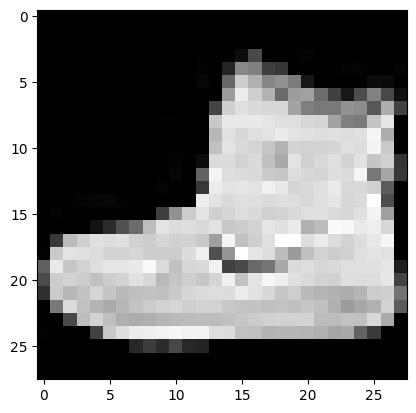

In [44]:
plt.imshow(image.squeeze(), cmap="gray")

In [45]:
# Pass image through model
# model_2(image.to(device))

In [46]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [47]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [48]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0] # select the first image

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [49]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [51]:
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping througth `nn.MaxPool2d`

documentation : https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [52]:
test_image.shape

torch.Size([3, 64, 64])

In [53]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimention: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the data through the conv layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv. layer: {test_image_through_conv.shape}")

# Pass the data through the max pooling layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and max pooling layer: {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimention: torch.Size([1, 3, 64, 64])
Shape after going through conv. layer: torch.Size([1, 10, 62, 62])
Shape after going through conv and max pooling layer: torch.Size([1, 10, 31, 31])


#### An Example to see what is going on in maxpool layer:

In [54]:

# Create a random tensor with a similar number of dimensions to our images

random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f'\nRandom tensor: \n{random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pooling layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor: \n{max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')


Random tensor: 
tensor([[[[0.4963, 0.0045],
          [0.5534, 0.1379]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
tensor([[[[0.5534]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3  Setup a loss function and an optimizer for `model_2`

In [55]:
# Setup loss function/eval metrics/optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [56]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and Testing `model_2` using our training and testing functions

In [57]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n ------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start= train_time_start_model_2,
                                             end=train_time_end_model_2,
                                             device=device,)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ------
Train loss: 0.59518 | Train acc: 78.38%
Test loss:  0.39500 | Test acc: 85.99%

Epoch: 1
 ------
Train loss: 0.36536 | Train acc: 86.90%
Test loss:  0.35244 | Test acc: 86.91%

Epoch: 2
 ------
Train loss: 0.32588 | Train acc: 88.13%
Test loss:  0.32719 | Test acc: 88.07%

Train time on cpu: 172.830 seconds


In [58]:
# Get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device=device)
model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name: ': 'FashionMNISTModelV2',
 'model_loss: ': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [59]:
model_0_results

{'model_name: ': 'FashionMNISTModelV0',
 'model_loss: ': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time

In [60]:
import pandas as pd
compare_results = pd.DataFrame([
    model_0_results,
    model_1_results,
    model_2_results,
])
compare_results

,model_name:,model_loss:,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [61]:
# Add training time to results comparison
compare_results["training_time"] = [
    f"{total_train_time_model_0:.3f}",
    f"{total_train_time_model_1:.3f}",
    f"{total_train_time_model_2:.3f}",
]
compare_results

,model_name:,model_loss:,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.826
1,FashionMNISTModelV1,0.685001,75.019968,35.672
2,FashionMNISTModelV2,0.327190,88.069089,172.830


Text(0, 0.5, 'Model')

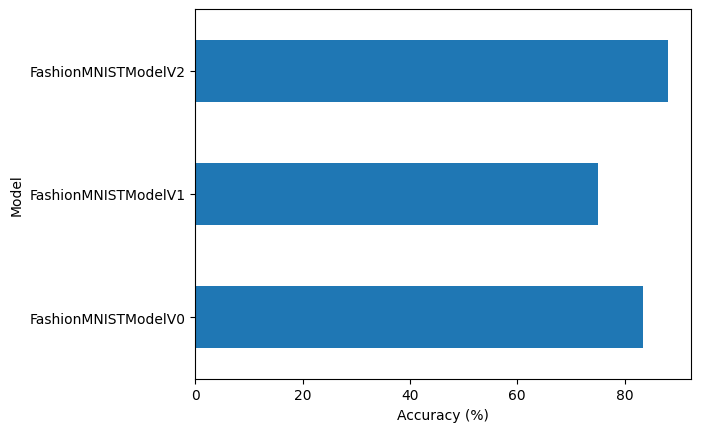

In [62]:
# Visualize our model results
compare_results.set_index("model_name: ")["model_acc"].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

## 9. Make and evaluate random predictions with best model

In [63]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            sample = sample.unsqueeze(dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get the prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)


In [64]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [65]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

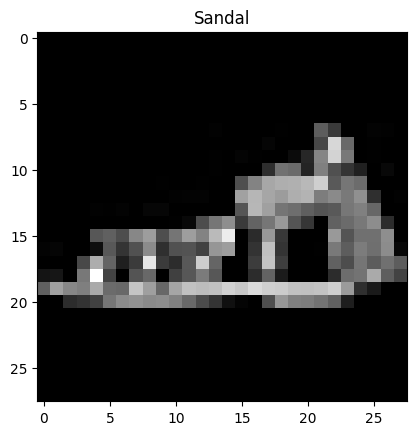

In [66]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [67]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                            data=test_samples,
                            device=device)
# View first two predictions probabilities
pred_probs[:2]

tensor([[2.2646e-04, 1.1115e-05, 1.4384e-04, 5.3210e-04, 1.2382e-04, 9.9348e-01,
         2.0233e-04, 2.4431e-03, 2.4878e-03, 3.4559e-04],
        [3.0825e-06, 1.2278e-06, 8.3739e-06, 9.6555e-07, 1.1098e-06, 4.1664e-04,
         7.1256e-06, 2.0282e-04, 3.8610e-05, 9.9932e-01]])

In [68]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 9, 6, 8, 8, 5, 7, 9, 4])

In [69]:
test_labels

[5, 9, 6, 8, 8, 5, 7, 9, 4]

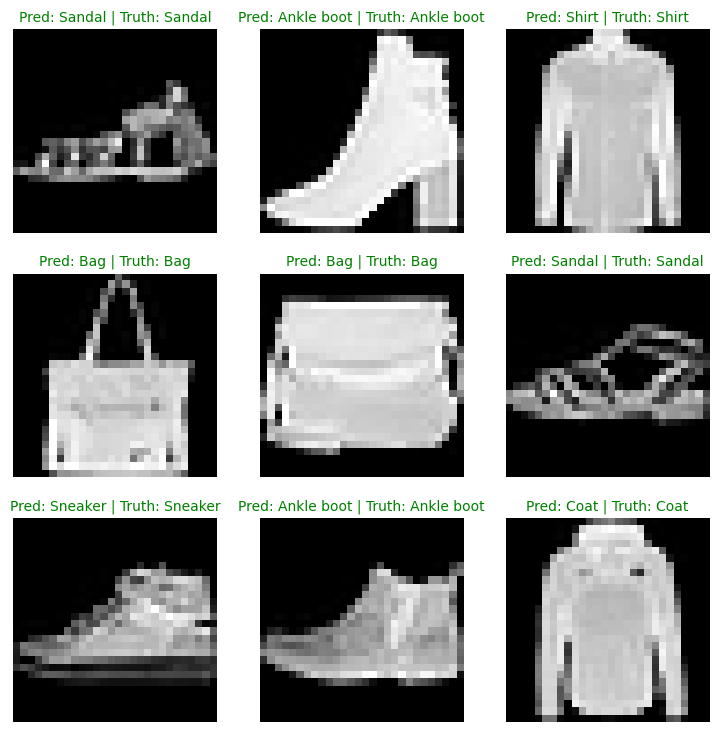

In [70]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in text form, e.g, "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g, "Sandal")
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for quality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.Confusion_matrix` - https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [71]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1.Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= 'Making predictions...'):

        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logits = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# print(y_preds)

# Concatenate list of predictions into a tensor
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor







Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [72]:
# See if required packages are installed and if not, install them ...
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version 0.19.0 or higher is required"
    print(f"torchmetrics version: {torchmetrics.__version__}")
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    print(f"torchmetrics version: {torchmetrics.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 13.2 MB/s eta 0:00:00
mlxtend version: 0.23.1
torchmetrics version: 1.4.1


In [73]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensro = confmat(preds=y_preds_tensor,
                          target = test_data.targets)

confmat_tensro


tensor([[628,   5,  44,  79,  12,   1, 224,   0,   7,   0],
        [  8, 895,   7,  68,  13,   0,   5,   0,   3,   1],
        [  7,   1, 810,  13,  95,   0,  69,   0,   5,   0],
        [ 25,  13,  25, 861,  36,   0,  34,   0,   4,   2],
        [  5,   6, 117,  50, 712,   0, 106,   0,   4,   0],
        [  6,   0,   9,  11,   0, 840,   4,  44,  66,  20],
        [ 69,   7, 123,  64,  98,   0, 626,   0,  13,   0],
        [  1,   1,   0,   1,   0,  33,   0, 877,  18,  69],
        [  8,   2,  23,  17,   6,   7,  29,   7, 900,   1],
        [  1,   0,   1,   2,   0,  20,   4,  71,  11, 890]])

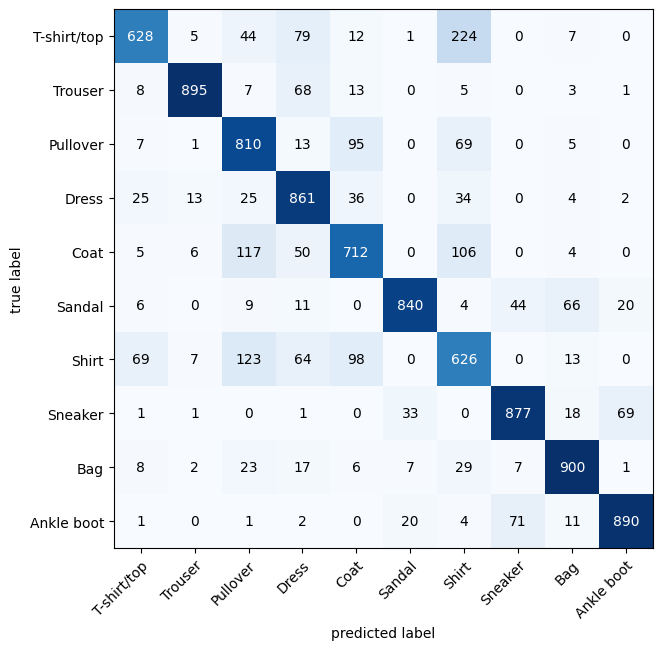

In [74]:
# 3. Plot the confuction matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensro.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7),
)

## 11. Save and load best performing model

In [75]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)




Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [78]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(
    input_shape = 1,
    hidden_units = 10,
    output_shape = len(class_names)
)

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [79]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name: ': 'FashionMNISTModelV2',
 'model_loss: ': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [80]:
model_2_results

{'model_name: ': 'FashionMNISTModelV2',
 'model_loss: ': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [86]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss: ']),
              torch.tensor(loaded_model_2_results['model_loss: ']),
              atol=1e-02 # absolute tolerance
              )

tensor(True)